In [1]:
# importing required libraries and importing warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
# read the file

appli1 = pd.read_csv('application_data.csv')
prev1 = pd.read_csv('previous_application.csv')


In [3]:
pd.set_option('display.max_columns',123)
pd.set_option('display.max_rows',200)

In [4]:
#checking the dataframe 

appli1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#checking the dataframe

prev1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


## 1. Variable identification

In [6]:
appli1.shape

(307511, 122)

In [7]:
#data info

appli1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# describing daa

appli1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 2. Missing value treatment

In [9]:
# Rounding-off the null value percentage to Two Decimals.

round(appli1.isnull().sum()*100/len(appli1.index),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [10]:
#checking columns

appli1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [11]:
# Checking whose null percentage is greater than 45% and assigning it to dcols

dcols = appli1.columns[appli1.isnull().mean()>0.45]

In [12]:
dcols

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [13]:
# Updating application DataFrame by dropping columns with high percentage of Null values

appli1 = appli1.drop(dcols,axis=1)

In [14]:
# Checking shape of updated DataFrame

appli1.shape

(307511, 73)

In [15]:
# info of updated application
appli1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
round(appli1.isnull().mean()*100,2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
NAME_TYPE_SUITE                 0.42
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_MOBIL                      0.00
FLAG_WORK_PHONE                 0.00
FLAG_EMP_PHONE                  0.00
DAYS_REGISTRATION               0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
CNT_FAM_MEMBERS                 0.00
DAYS_ID_PUBLISH                 0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_EMPLOYED                   0.00
AMT_INCOME_TOTAL                0.00
T

## 3. Missing value Treatment
     
###     3.1 imputing columns with less than 45% of null values 

In [17]:
appli1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [18]:
appli1.loc[pd.isnull(appli1['OCCUPATION_TYPE']), ['OCCUPATION_TYPE']] = "Laborers"

In [19]:
appli1['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [20]:
appli1['EXT_SOURCE_2'].mode()[0]

0.2858978721410488

In [21]:
appli1.fillna(appli1['EXT_SOURCE_2'].mode()[0],inplace=True)

In [22]:
appli1['EXT_SOURCE_2'].isnull().sum()

0

#### 3.2 Replacing the values with mode

In [23]:
appli1['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]

0.0

In [24]:
appli1.fillna(appli1['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)

In [25]:
appli1['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]

0.0

In [26]:
appli1.fillna(appli1['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)

In [27]:
appli1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]

0.0

In [28]:
appli1.fillna(appli1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)

In [29]:
appli1['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0]

0.0

In [30]:
appli1.fillna(appli1['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)

In [31]:
appli1['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

0.0

In [32]:
appli1.fillna(appli1['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)

In [33]:
appli1['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]

0.0

In [34]:
appli1.fillna(appli1['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)

In [35]:
appli1['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [36]:
appli1.fillna(appli1['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [37]:
appli1['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

In [38]:
appli1.fillna(appli1['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)

### 4.Variable conversion

In [39]:
appli1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [40]:
appli1.shape

(307511, 73)

In [41]:
# dropping non requried columns
dcols2 = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','EXT_SOURCE_3','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE']

In [42]:
appli1 = appli1.drop(dcols2,axis=1)

In [43]:
appli1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [44]:
appli1.isnull().mean().round(2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CI

In [45]:
appli1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27107.516063,5.379095e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.139023e-01,1.418473,0.143894,1.401576,0.100666,0.044139,0.044656,0.068323,0.269893,0.268232,1.682048
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14494.443736,3.696338e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.911477e-01,2.397891,0.446032,2.376722,0.361847,0.123307,0.140339,0.208874,0.851947,0.738540,1.823935
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.285898,2.858979e-01,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.907824e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285898
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.654672e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.634218e-01,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.285898,0.285898,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


####  4.1 Identifying negative values and handliing negative values

In [46]:
appli1["DAYS_BIRTH"] = abs(appli1["DAYS_BIRTH"]).astype("float64")
appli1["DAYS_EMPLOYED"] = abs(appli1["DAYS_EMPLOYED"]).astype("float64")
appli1["DAYS_ID_PUBLISH"] = abs(appli1["DAYS_ID_PUBLISH"]).astype("float64")
appli1["DAYS_REGISTRATION"] = abs(appli1["DAYS_REGISTRATION"]).astype("float64")

In [47]:
appli1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27107.516063,5.379095e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.139023e-01,1.418473,0.143894,1.401576,0.100666,0.044139,0.044656,0.068323,0.269893,0.268232,1.682048
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14494.443736,3.696338e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.911477e-01,2.397891,0.446032,2.376722,0.361847,0.123307,0.140339,0.208874,0.851947,0.738540,1.823935
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.285898,2.858979e-01,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.907824e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285898
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.654672e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.634218e-01,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.285898,0.285898,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### 4.2 Identifying categorical and continous variables

In [48]:
appli1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [49]:
appli1.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_WORK_CITY              2
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
AMT_REQ_CREDIT_BUREAU_HOUR          6
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
NAME_TYPE_SUITE                     8
DEF_60_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_DAY          10
AMT_REQ_CREDIT_BUREAU_WEEK         10
DEF_30_CNT_SOCIAL_CIRCLE           11
AMT_REQ_CREDIT_BUREAU_QRT          12
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
HOUR_APPR_PROCESS_START            24
AMT_REQ_CRED

In [50]:
conv_to_cat = ['REG_REGION_NOT_WORK_REGION', 'TARGET', 'LIVE_CITY_NOT_WORK_CITY','FLAG_OWN_REALTY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY','FLAG_OWN_CAR',
       'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION'] 
appli1[conv_to_cat] = appli1[conv_to_cat].astype(object)

In [51]:
appli1.select_dtypes(include='object').nunique().sort_values()

TARGET                          2
NAME_CONTRACT_TYPE              2
FLAG_OWN_CAR                    2
FLAG_OWN_REALTY                 2
REG_CITY_NOT_WORK_CITY          2
REG_CITY_NOT_LIVE_CITY          2
LIVE_REGION_NOT_WORK_REGION     2
LIVE_CITY_NOT_WORK_CITY         2
REG_REGION_NOT_WORK_REGION      2
REG_REGION_NOT_LIVE_REGION      2
CODE_GENDER                     3
NAME_EDUCATION_TYPE             5
NAME_HOUSING_TYPE               6
NAME_FAMILY_STATUS              6
WEEKDAY_APPR_PROCESS_START      7
NAME_INCOME_TYPE                8
NAME_TYPE_SUITE                 8
OCCUPATION_TYPE                18
ORGANIZATION_TYPE              58
dtype: int64

In [52]:
appli1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### 4.3 Converting contious columns into numeric

In [53]:
counti_cols = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE']
appli1[counti_cols]=appli1[counti_cols].apply(pd.to_numeric)
appli1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,0.285898,0.285898,0.285898,0.285898,0.285898,0.285898
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 5. Outlier treatment
###   5.1 Outlier Analysis
##### Let us create a boxplot function for the Outlier Analysis,Below are the parameters :
* Dataframe
* Column name
* Title


In [54]:
appli1.select_dtypes(include=np.number).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [55]:
cols2 = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

DAYS_BIRTH              AxesSubplot(0.125,0.125;0.168478x0.755)
DAYS_EMPLOYED        AxesSubplot(0.327174,0.125;0.168478x0.755)
DAYS_REGISTRATION    AxesSubplot(0.529348,0.125;0.168478x0.755)
DAYS_ID_PUBLISH      AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

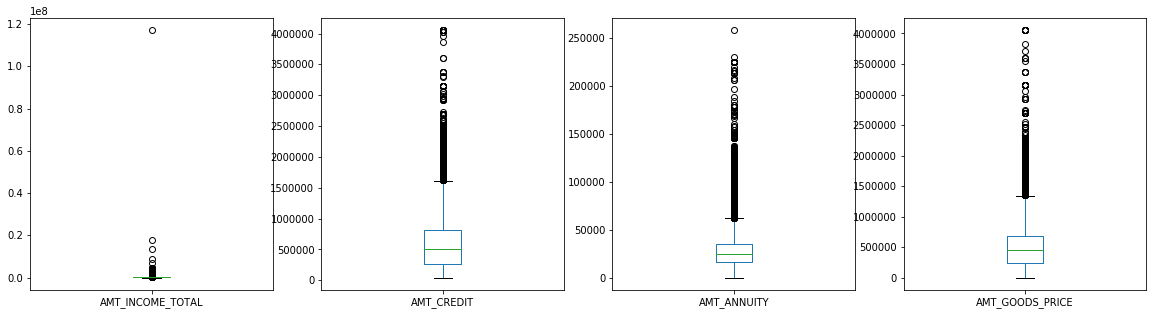

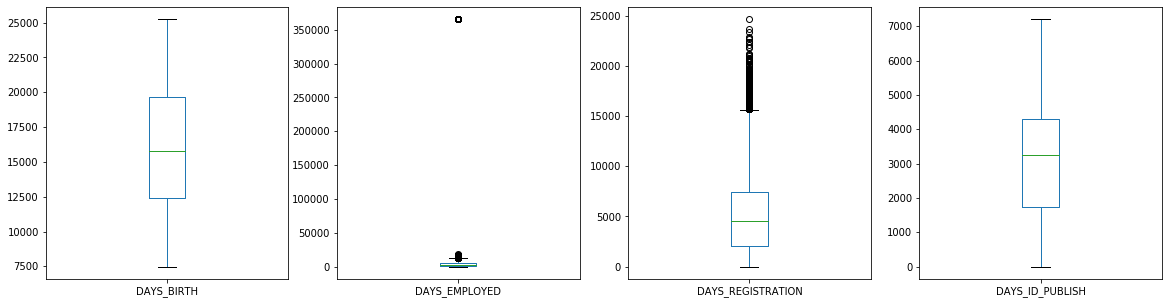

In [56]:
# box plot for plotting the outliers
appli1[cols2[0:4]].plot.box(subplots=True,figsize=(20,5))
appli1[cols2[4:]].plot.box(subplots=True,figsize=(20,5))

In [57]:
appli1[cols2].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27107.516063,5.379095e+05,16036.995067,67724.742149,4986.120328,2994.202373
std,2.371231e+05,4.024908e+05,14494.443736,3.696338e+05,4363.988632,139443.751806,3522.886321,1509.450419
min,2.565000e+04,4.500000e+04,0.285898,2.858979e-01,7489.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,12413.000000,933.000000,2010.000000,1720.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,15750.000000,2219.000000,4504.000000,3254.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,19682.000000,5707.000000,7479.500000,4299.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,25229.000000,365243.000000,24672.000000,7197.000000


### 5.1.1 Outlier Analysis for AMT_CREDIT

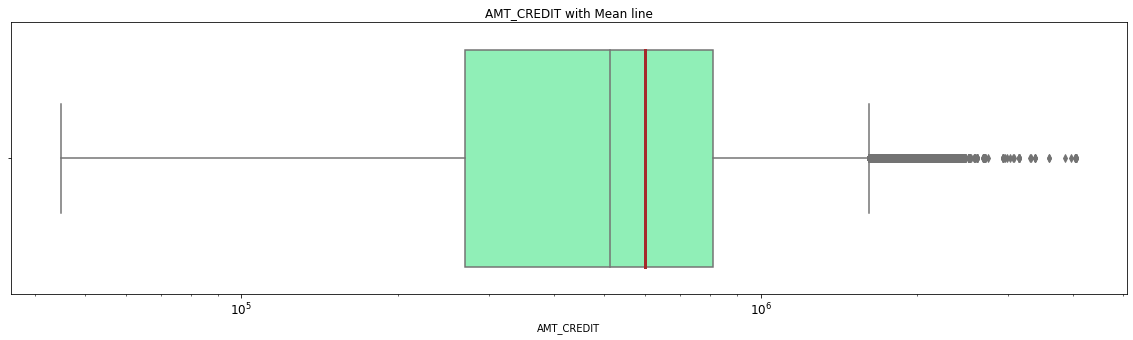

In [58]:
plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
sns.boxplot(appli1.AMT_CREDIT,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.title('AMT_CREDIT with Mean line')
plt.show()

### Inferences :
- The lower fence of the Boxplot lies between 0 and 10^5, while the upper fence lies between 10^6 and 10^7.
- The outliers seem to range between 10^6 and 10^7.
- The first quartile seems very big compared to the third quartlie indicating many values lie with first quartile.

### 5.1.2 Outlier Analysis for AMT_GOODS_PRICE

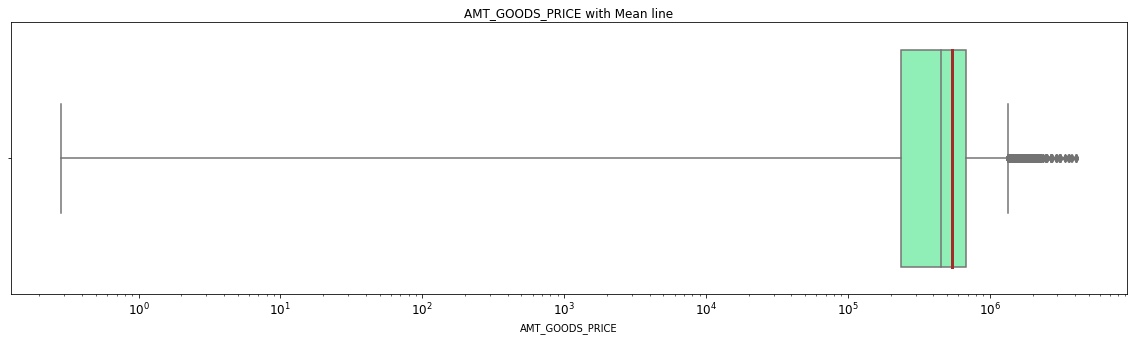

In [59]:
plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
sns.boxplot(appli1.AMT_GOODS_PRICE,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.title('AMT_GOODS_PRICE with Mean line')
plt.show()

### Inferences :
- The lower fence of the Boxplot lies between 0 and 10^5, while the upper fence lies below 10^6 and 10^7.
- The outliers seem to range between 10^6 and above.
- The first quartile seems very big compared to the third quartlie indicating many values lie with first quartile.

### 5.1.3 Outlier Analysis for AMT_ANNUITY

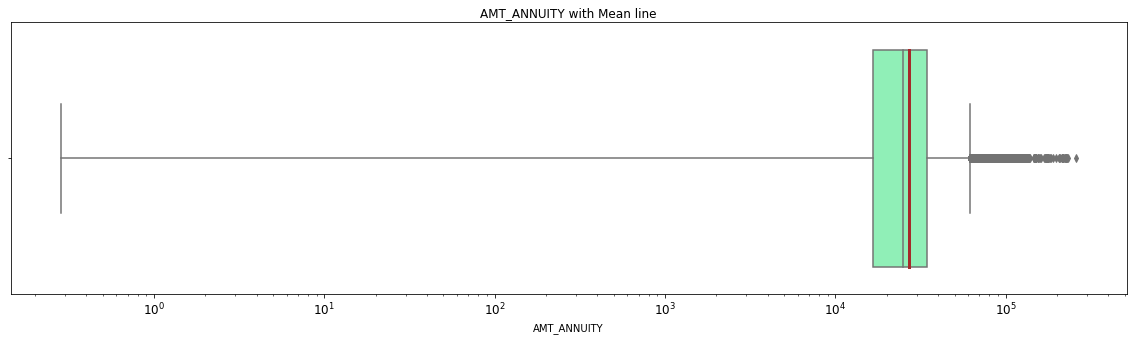

In [60]:
plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
sns.boxplot(appli1.AMT_ANNUITY,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.title('AMT_ANNUITY with Mean line')
plt.show()

### Inferences :
- The lower fence of the Boxplot lies between 0 and 10^4, while the upper fence lies below 10^5.
- The outliers seem to range between 10^5 and above

### 5.1.4 Outlier Analysis for DAYS_BIRTH

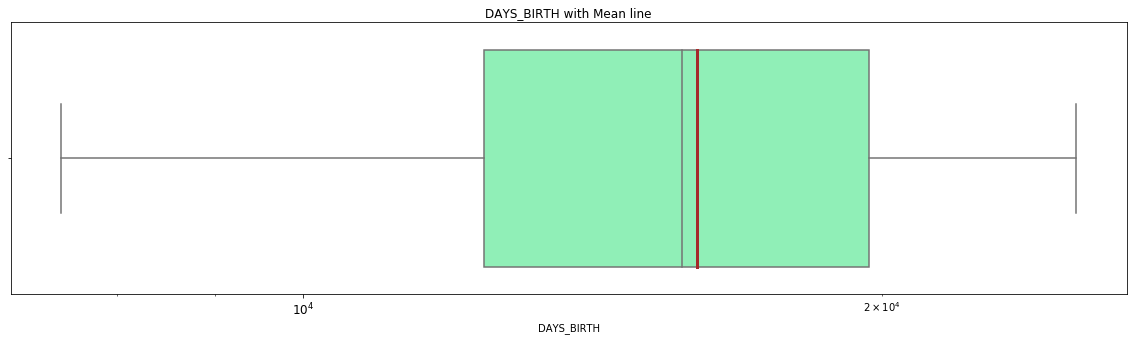

In [61]:
plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
sns.boxplot(appli1.DAYS_BIRTH,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.title('DAYS_BIRTH with Mean line')
plt.show()

### Inferences :
- The lower fence of the Boxplot lies between 0 and 10^5, while the upper fence lies between 2 x 10^4 and 3 x 10^4.
- The first quartile seems very big compared to the third quartlie indicating many values lie with first quartile.

### 5.1.5 Outlier Analysis for AMT_INCOME_TOTAL

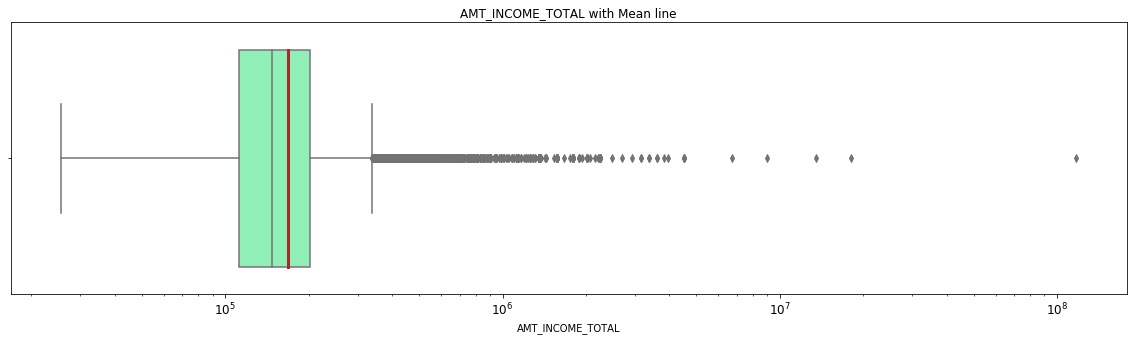

In [62]:
# AMT_INCOME_TOTAL

plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
sns.boxplot(appli1.AMT_INCOME_TOTAL,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.title('AMT_INCOME_TOTAL with Mean line')
plt.show()

### Inferences :
- The lower fence of the Boxplot lies between 0 and 10^5, while the upper fence lies between 10^5 and 10^6.
- The outliers seem to be ranging even higher than 10^7.
- The first quartile seems very big compared to the third quartlie indicating many values lie with first quartile.


In [63]:
appli1['AMT_INCOME_TOTAL'].quantile([0.5,0.7,0.8,0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

### 5.1.6 Outlier Analysis for DAYS_EMPLOYED

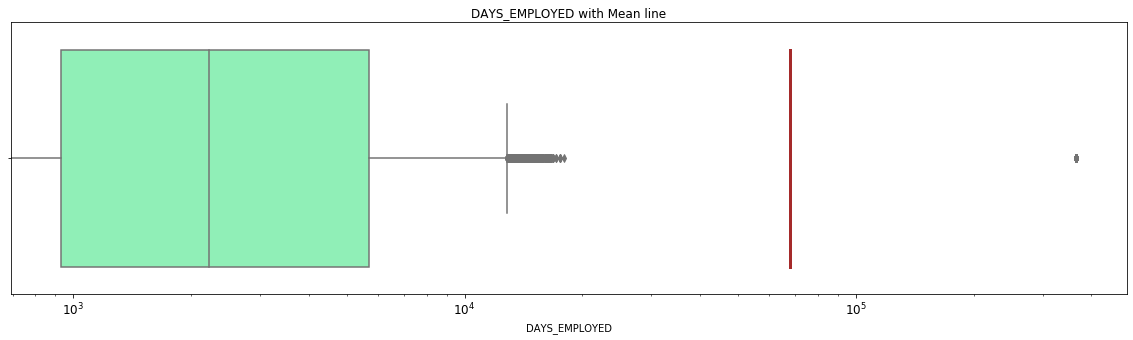

In [64]:
plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
plt.title('DAYS_EMPLOYED with Mean line')
sns.boxplot(appli1.DAYS_EMPLOYED,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.show()

In [65]:
appli1['DAYS_EMPLOYED'].quantile([0.5,0.7,0.8,0.9,0.95,0.99])

0.50      2219.0
0.70      4435.0
0.80      9188.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

- values spread in DAYS_EMPLOYED are mostly around 80 percentile and from above we can see that 99 and 95 percentile are just a outliers and mean lies over the 100 percentile 
- excluding 365243, try to calculate mean and median 

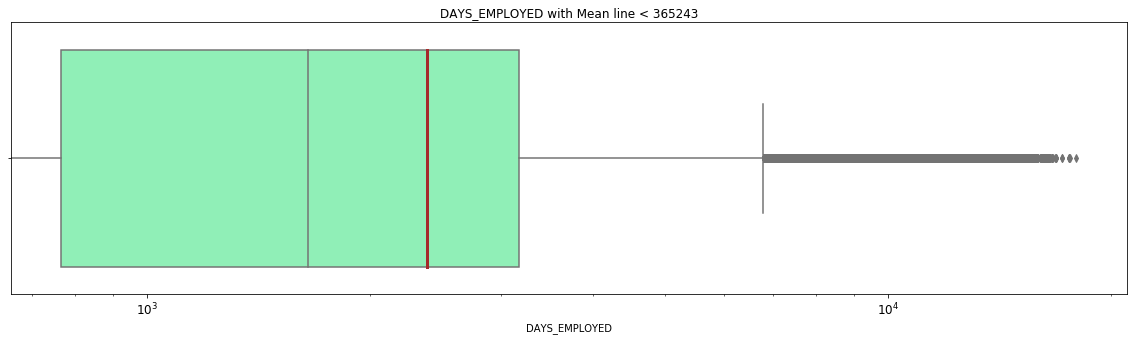

In [66]:
plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
plt.title('DAYS_EMPLOYED with Mean line < 365243')
sns.boxplot(appli1[appli1.DAYS_EMPLOYED<365243].DAYS_EMPLOYED,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.show()

### 5.1.7 Outlier Analysis for DAYS_REGISTRATION

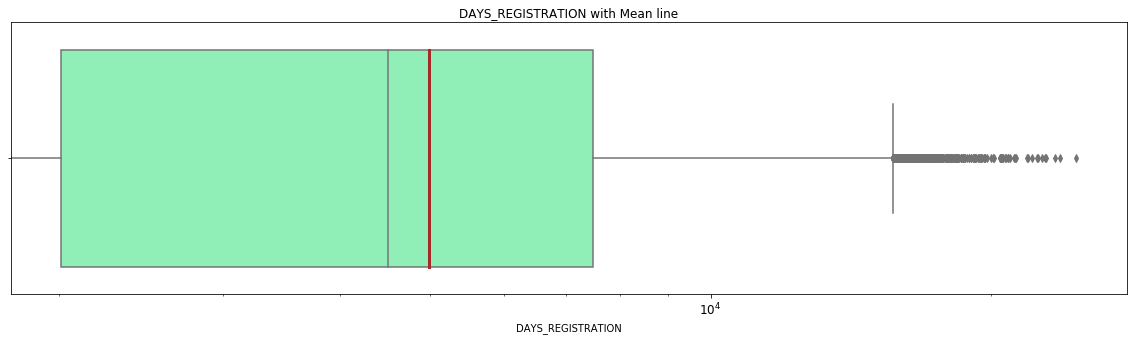

In [67]:
plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
sns.boxplot(appli1.DAYS_REGISTRATION,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.title('DAYS_REGISTRATION with Mean line')
plt.show()

### 5.1.8 Outlier Analysis for DAYS_ID_PUBLISH

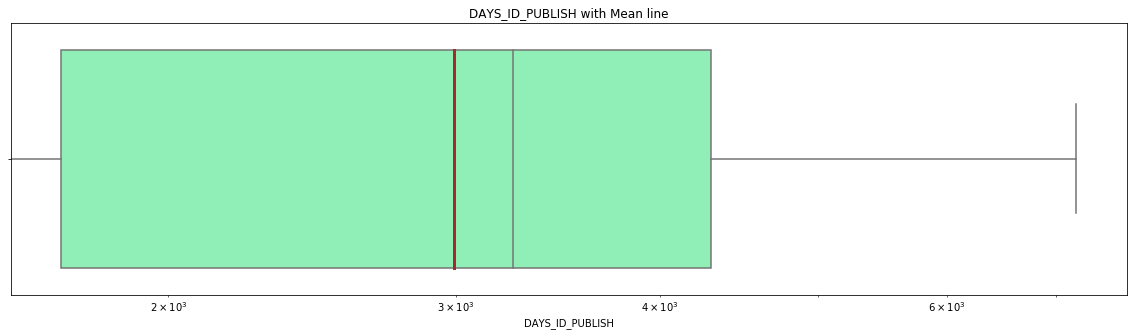

In [68]:
plt.figure(figsize=(20,5))
meanprops = dict(linestyle='-', linewidth=3, color='brown')
plt.xticks(fontsize = 12)
sns.boxplot(appli1.DAYS_ID_PUBLISH,meanline=True,showmeans = True, meanprops = meanprops,palette="rainbow")
plt.xscale('log')
plt.title('DAYS_ID_PUBLISH with Mean line')
plt.show()

### 5.2 Summary of inferences together :
#### 1. It has been a common observation that all the first quartile is always larger third quartile which inturn tells us the spread of the data exumpting columns inculding days.
#### 2. While the Region population has the lowest outliers and on the other hand Income has highest outliers.
#### 3. The log scale boxplot appears to have been suitable for all the three paramerts based on the nature of the values.

### 5.3 Binning two continous variables

In [69]:
# creating bins for income amount

bins_income = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000000]
class_income = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','Above 500000']

appli1['AMT_INCOME_CLASS']=pd.cut(appli1['AMT_INCOME_TOTAL'],bins_income,labels=class_income)

In [70]:
appli1['AMT_INCOME_CLASS'].value_counts()

100000-150000    91591
150000-200000    64307
50000-100000     59181
200000-250000    48137
250000-300000    17039
300000-350000     8874
350000-400000     5802
400000-450000     4924
0-50000           4517
Above 500000      2702
450000-500000      437
Name: AMT_INCOME_CLASS, dtype: int64

In [71]:
# creating bins for credit amount

bins_credit = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000000000]
class_credit = ['0-100000', '100000-200000','200000-300000', '300000-400000', '400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000', 'Above 1000000']

appli1['AMT_CREDIT_CLASS']=pd.cut(appli1['AMT_CREDIT'],bins_credit,labels=class_credit)

In [72]:
appli1['AMT_CREDIT_CLASS'].value_counts()

200000-300000     54813
Above 1000000     49985
500000-600000     34232
400000-500000     32038
100000-200000     30140
300000-400000     26338
600000-700000     24049
800000-900000     21792
700000-800000     19193
900000-1000000     8927
0-100000           6004
Name: AMT_CREDIT_CLASS, dtype: int64

### 6 Analysis on Target variable

#### 6.1 checking data imbalance of TARGET

In [73]:
appli1['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

### 0 - Non defaulter, 1-defaulter 

#### 92% values are 0 whereas 8% are 1, which shows a significance data imbalance

#### 6.2 Dividing dataframe appli1 into 2 data sets based on TARGET variables(0 & 1)

In [74]:
appli1_target0 = appli1.loc[appli1['TARGET']==0]
appli1_target1 = appli1.loc[appli1['TARGET']==1]

### 6.3 Univariate Analysis

#### Credit class

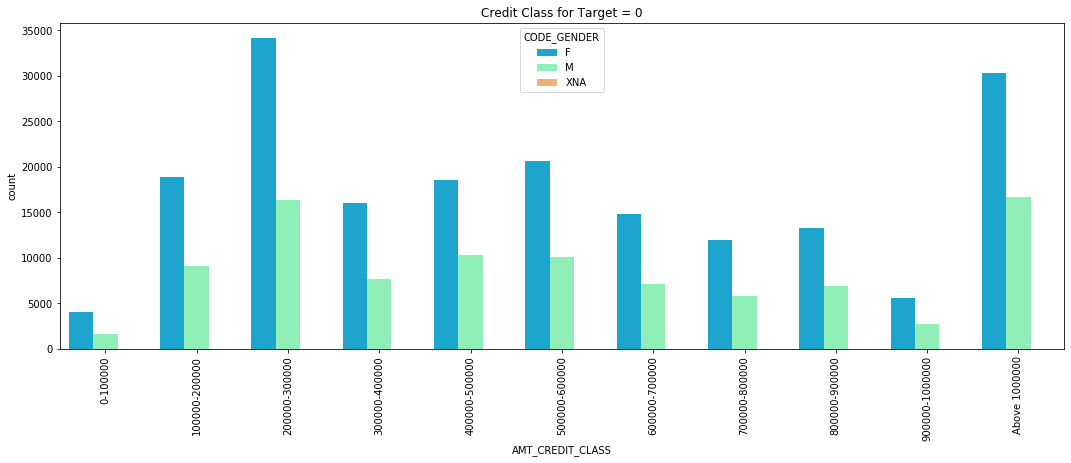

In [75]:
plt.figure(figsize=[18,6])
plt.title("Credit Class for Target = 0")
plt.xticks(rotation=90)
sns.countplot(appli1_target0["AMT_CREDIT_CLASS"], hue=appli1_target0["CODE_GENDER"],palette='rainbow')
plt.show()

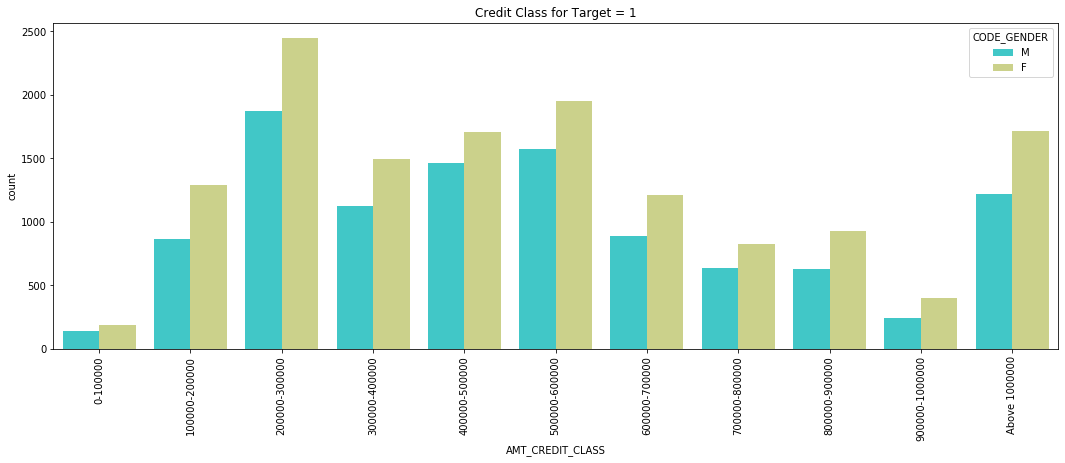

In [76]:
plt.figure(figsize=[18,6])
plt.title("Credit Class for Target = 1")
plt.xticks(rotation=90)
sns.countplot(appli1_target1["AMT_CREDIT_CLASS"], hue=appli1_target1["CODE_GENDER"],palette='rainbow')
plt.show()

#### Inferences :
- It can be seen that maximum Default intervals ranges from 2 t0 5 lakhs, 5 to 6 lakhs and above 10 lakhs

#### Income class

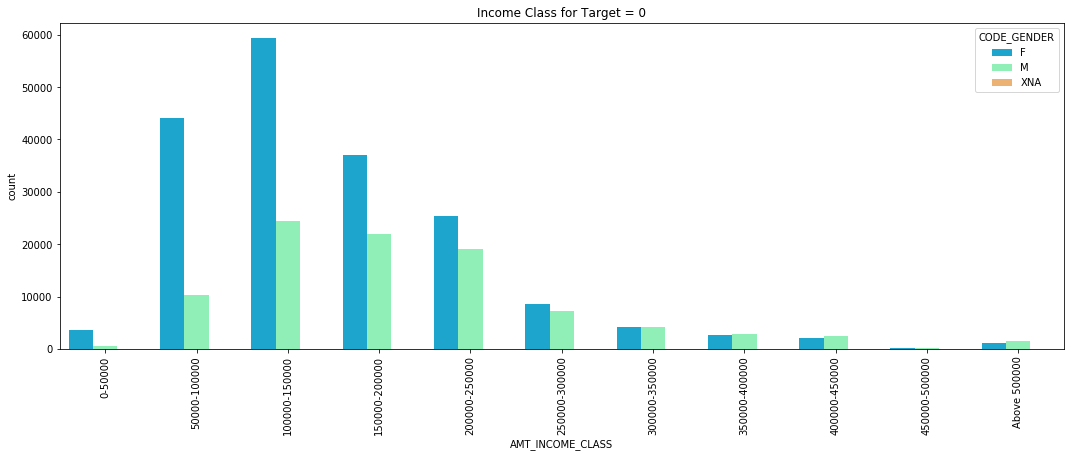

In [77]:
plt.figure(figsize=[18,6])
plt.title("Income Class for Target = 0")
plt.xticks(rotation=90)
sns.countplot(appli1_target0["AMT_INCOME_CLASS"], hue=appli1_target0["CODE_GENDER"],palette='rainbow')
plt.show()

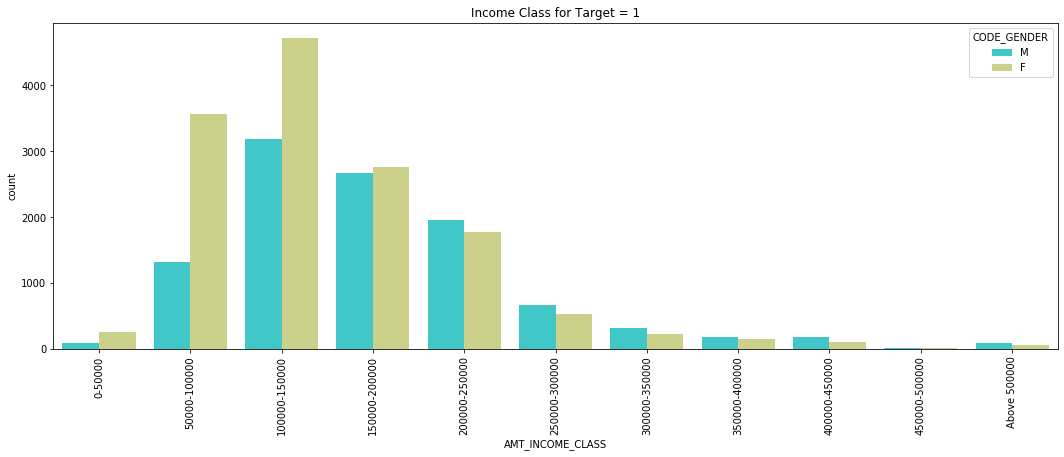

In [78]:
plt.figure(figsize=[18,6])
plt.title("Income Class for Target = 1")
plt.xticks(rotation=90)
sns.countplot(appli1_target1["AMT_INCOME_CLASS"], hue=appli1_target1["CODE_GENDER"],palette='rainbow')
plt.show()

#### inferences
- Clients income ranging from 50000 to 250000 have majority of defaults

#### GENDER

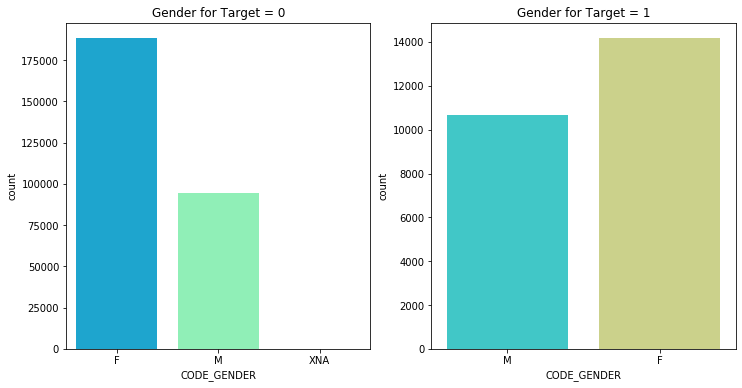

In [79]:
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.title("Gender for Target = 0")
sns.countplot(appli1_target0["CODE_GENDER"],palette='rainbow')
plt.subplot(1,2,2)
plt.title("Gender for Target = 1")
sns.countplot(appli1_target1["CODE_GENDER"],palette='rainbow')
plt.show()

#### Name income type

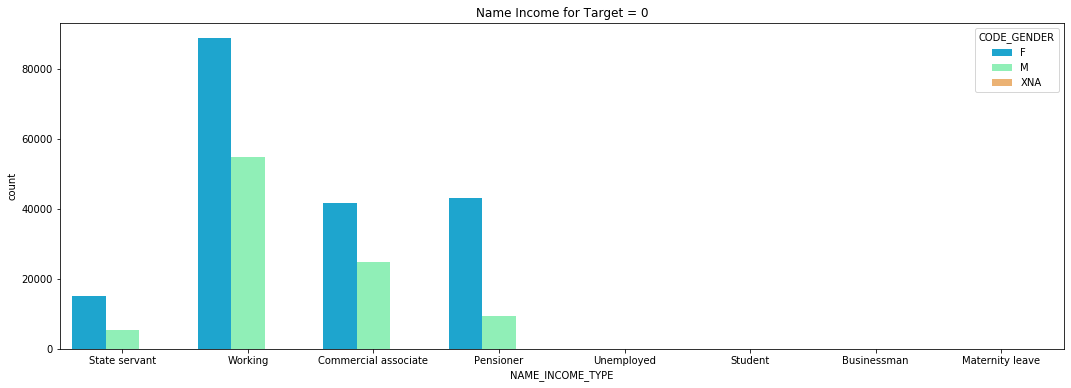

In [80]:
plt.figure(figsize=[18,6])
plt.title("Name Income for Target = 0")
sns.countplot(appli1_target0["NAME_INCOME_TYPE"], hue=appli1_target0["CODE_GENDER"],palette='rainbow')
plt.show()

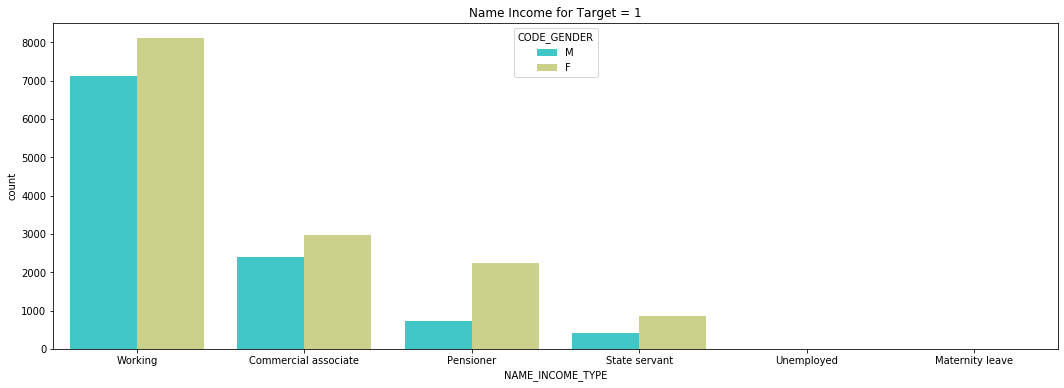

In [81]:
plt.figure(figsize=[18,6])
plt.title("Name Income for Target = 1")
sns.countplot(appli1_target1["NAME_INCOME_TYPE"], hue=appli1_target1["CODE_GENDER"],palette='rainbow')
plt.show()

#### inferences
- Working are more likely to default.

#### Name contract type

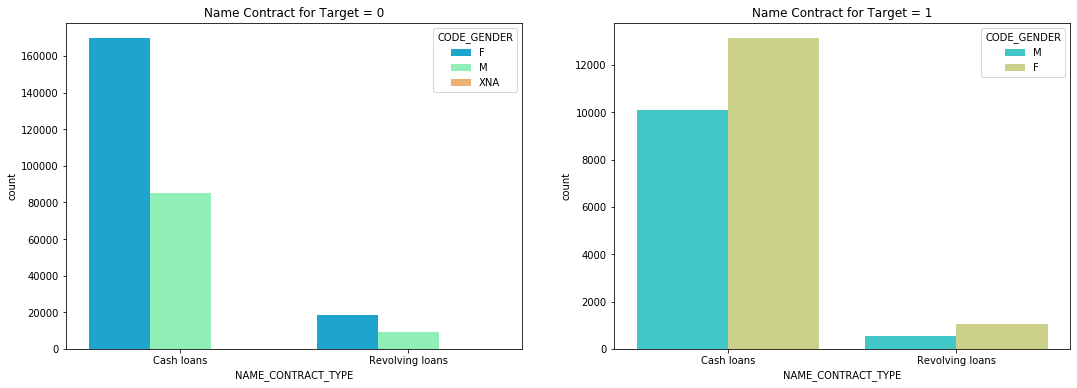

In [82]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
plt.title("Name Contract for Target = 0")
sns.countplot(appli1_target0["NAME_CONTRACT_TYPE"], hue=appli1_target0["CODE_GENDER"],palette='rainbow')
plt.subplot(1,2,2)
plt.title("Name Contract for Target = 1")
sns.countplot(appli1_target1["NAME_CONTRACT_TYPE"], hue=appli1_target1["CODE_GENDER"],palette='rainbow')
plt.show()

#### inferences 
- cash loans have higher default rate

### 6.4 Correlation for continous variables

In [83]:
appli1_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250000-300000,Above 1000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000-100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,0.285898,0.285898,0.285898,0.285898,0.285898,0.285898,100000-150000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000-150000,500000-600000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941.0,1588.0,4970.0,477.0,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,50000-100000,400000-500000


In [84]:
cols3 = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
appli1_target0_corr = appli1_target0[cols3].corr()

In [85]:
appli1_target0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020949,-0.000723,-0.024363,-0.336966,-0.245174,-0.185792,0.028751
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418906,0.349473,0.167851,-0.062609,-0.140392,-0.064937,-0.022896
AMT_CREDIT,0.003081,0.342799,1.000000,0.771248,0.986966,0.100604,0.047378,-0.070104,-0.013477,0.001464
AMT_ANNUITY,0.020949,0.418906,0.771248,1.000000,0.776624,0.120899,-0.012233,-0.104933,-0.039437,-0.014097
AMT_GOODS_PRICE,-0.000723,0.349473,0.986966,0.776624,1.000000,0.103926,0.045135,-0.068160,-0.015789,0.003820
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120899,0.103926,1.000000,0.025244,-0.007198,0.052083,0.001071
DAYS_BIRTH,-0.336966,-0.062609,0.047378,-0.012233,0.045135,0.025244,1.000000,0.626114,0.333151,0.271314
DAYS_EMPLOYED,-0.245174,-0.140392,-0.070104,-0.104933,-0.068160,-0.007198,0.626114,1.000000,0.214511,0.276663
DAYS_REGISTRATION,-0.185792,-0.064937,-0.013477,-0.039437,-0.015789,0.052083,0.333151,0.214511,1.000000,0.100236
DAYS_ID_PUBLISH,0.028751,-0.022896,0.001464,-0.014097,0.003820,0.001071,0.271314,0.276663,0.100236,1.000000


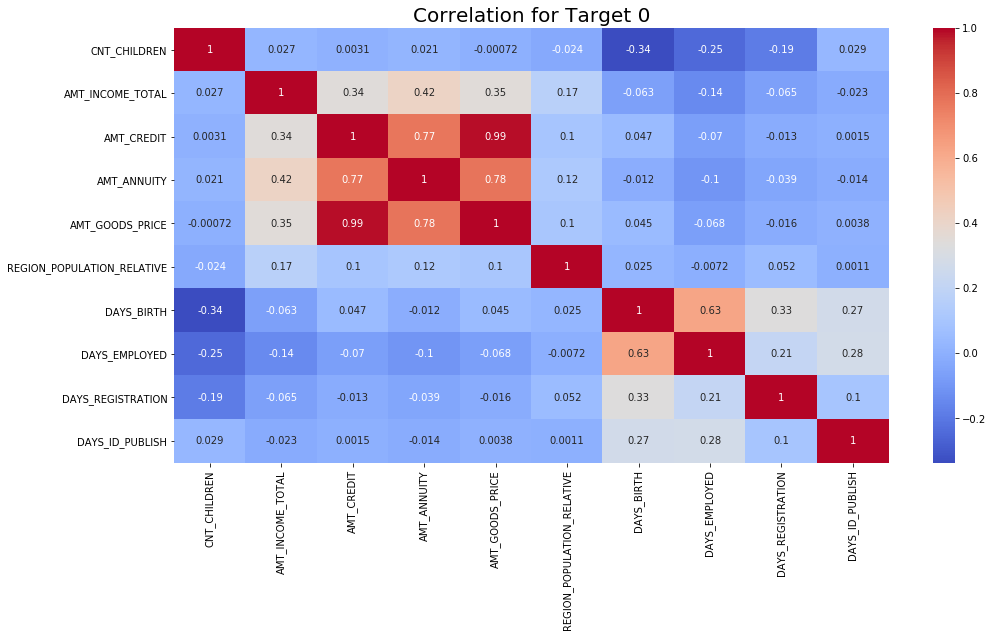

In [86]:
plt.figure(figsize=[16,8])
plt.title("Correlation for Target 0", fontsize = 20)
sns.heatmap(appli1_target0_corr, cmap="coolwarm",annot=True)
plt.show()

#### Inferences :
1. Income amount correlates postively with credit taken
2. Childen's count inversely correlates with age.
3. Overall we can't see a strong correlation between any other parameters.

In [87]:
appli1_target1_corr = appli1_target1[cols3].corr()

In [88]:
appli1_target1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008122,-0.031975,-0.259109,-0.192864,-0.149154,0.032299
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037647,0.009135,-0.003096,-0.014977,-0.000158,0.004215
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.982854,0.069161,0.135316,0.001930,0.025854,0.052329
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752891,0.071690,0.014303,-0.081207,-0.034279,0.016767
AMT_GOODS_PRICE,-0.008122,0.037647,0.982854,0.752891,1.000000,0.076303,0.135516,0.006734,0.025556,0.056057
REGION_POPULATION_RELATIVE,-0.031975,0.009135,0.069161,0.071690,0.076303,1.000000,0.048190,0.015532,0.056222,0.015537
DAYS_BIRTH,-0.259109,-0.003096,0.135316,0.014303,0.135516,0.048190,1.000000,0.582185,0.289114,0.252863
DAYS_EMPLOYED,-0.192864,-0.014977,0.001930,-0.081207,0.006734,0.015532,0.582185,1.000000,0.192455,0.229090
DAYS_REGISTRATION,-0.149154,-0.000158,0.025854,-0.034279,0.025556,0.056222,0.289114,0.192455,1.000000,0.096833
DAYS_ID_PUBLISH,0.032299,0.004215,0.052329,0.016767,0.056057,0.015537,0.252863,0.229090,0.096833,1.000000


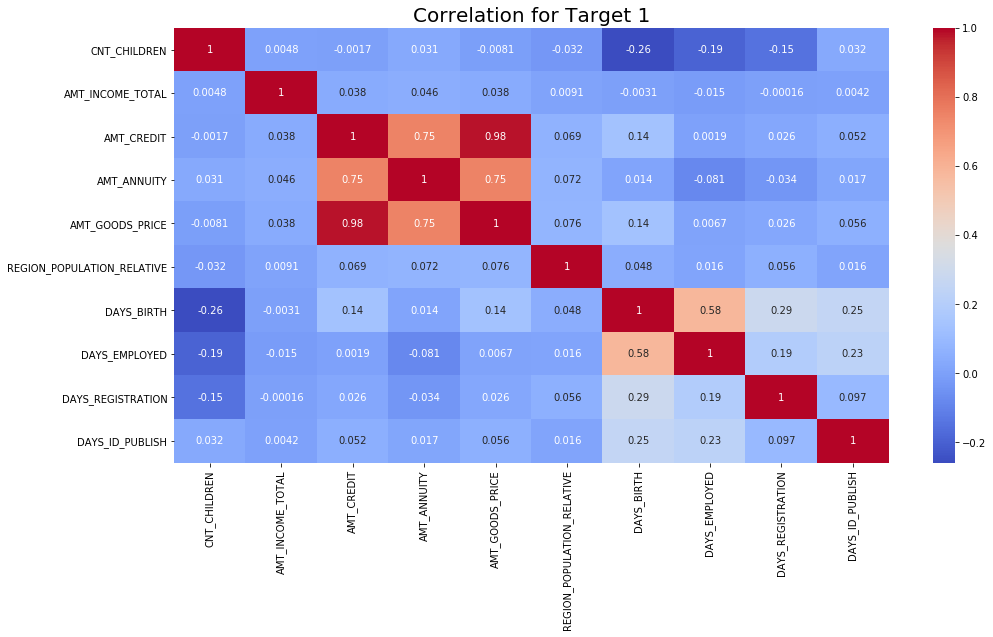

In [89]:
plt.figure(figsize=[16,8])
plt.title("Correlation for Target 1", fontsize = 20)
sns.heatmap(appli1_target1_corr, cmap="coolwarm",annot=True)
plt.show()

#### Inferences :
- The correlation matrices of TARGET = 0 and TARGET = 1 with considered numeric paramerts appear similar

### 6.5 Bivariate analysis

#### categorical - continous 

In [90]:
def boxplots_bivariate(column1,column2,title1,title2):
    plt.subplot(1,2,1)
    plt.yscale('log')
    plt.title(title1)
    plt.xticks(rotation=45)
    sns.boxplot(data =appli1_target0, x=column1,y=column2,orient='v',palette='rainbow')
    plt.subplot(1,2,2)
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.title(title2)
    sns.boxplot(data =appli1_target1, x=column1,y=column2,orient='v',palette='rainbow')
    plt.show()

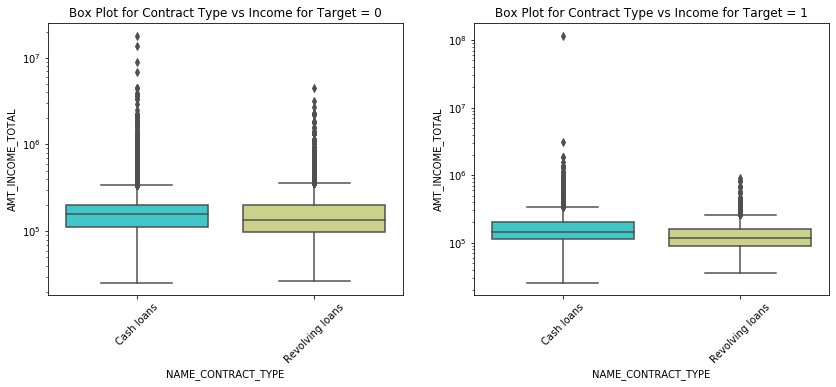

In [91]:
#  NAME_CONTRACT_TYPE vs AMT_INCOME_TOTAL
plt.figure(figsize=(14,5))
boxplots_bivariate("NAME_CONTRACT_TYPE","AMT_INCOME_TOTAL", "Box Plot for Contract Type vs Income for Target = 0","Box Plot for Contract Type vs Income for Target = 1")

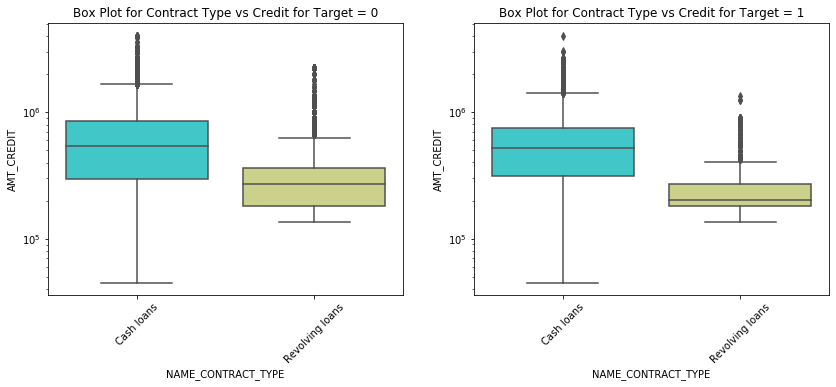

In [92]:
# NAME_CONTRACT_TYPE vs AMT_CREDIT
plt.figure(figsize=(14,5))
boxplots_bivariate("NAME_CONTRACT_TYPE","AMT_CREDIT", "Box Plot for Contract Type vs Credit for Target = 0","Box Plot for Contract Type vs Credit for Target = 1")

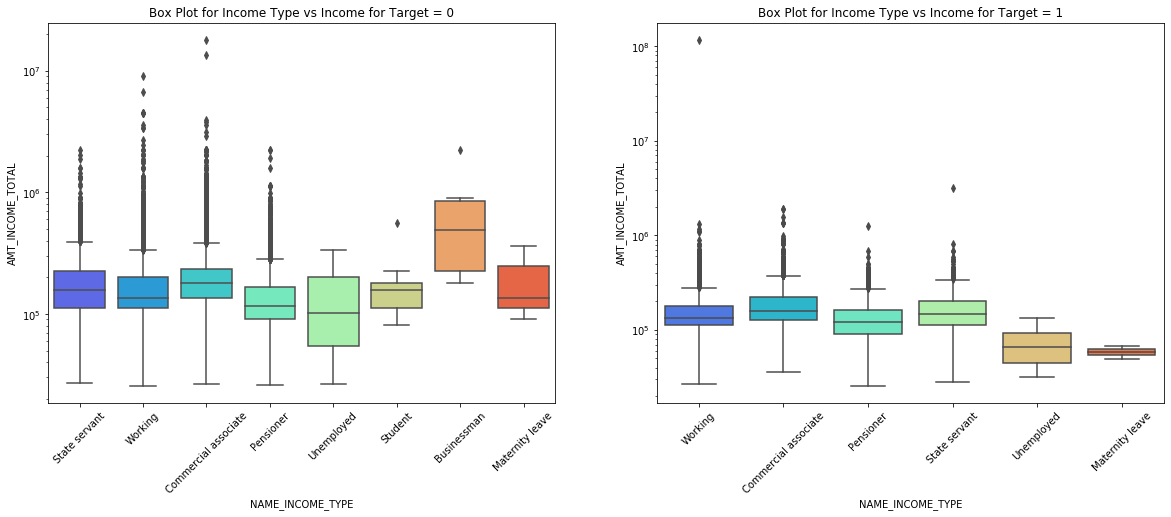

In [93]:
# NAME_INCOME_TYPE vs AMT_INCOME_TOTAL
plt.figure(figsize=(20,7))
boxplots_bivariate("NAME_INCOME_TYPE","AMT_INCOME_TOTAL", "Box Plot for Income Type vs Income for Target = 0","Box Plot for Income Type vs Income for Target = 1")

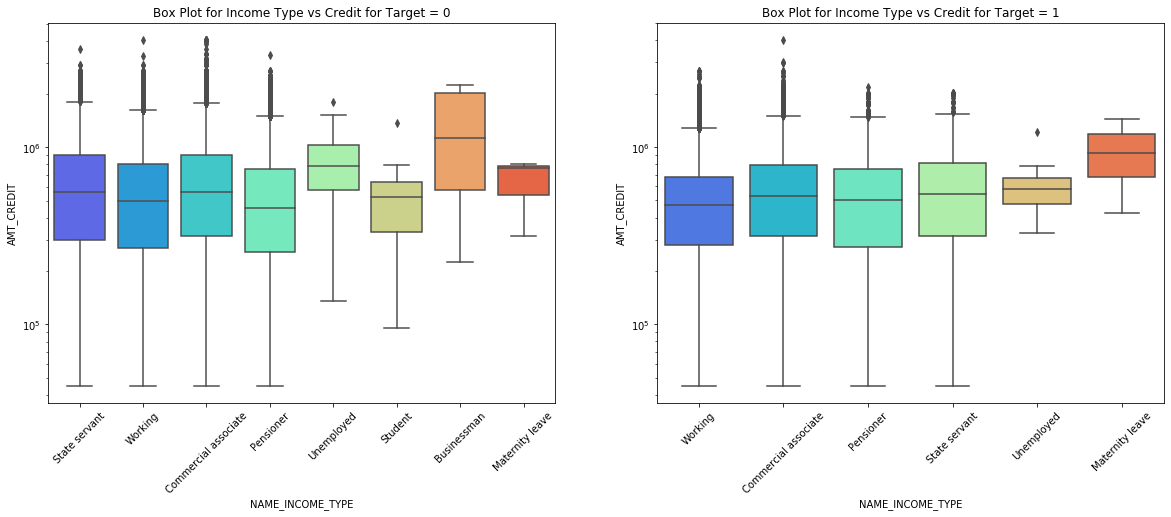

In [94]:
# NAME_INCOME_TYPE vs AMT_CREDIT
plt.figure(figsize=(20,7))
boxplots_bivariate("NAME_INCOME_TYPE","AMT_CREDIT", "Box Plot for Income Type vs Credit for Target = 0","Box Plot for Income Type vs Credit for Target = 1")

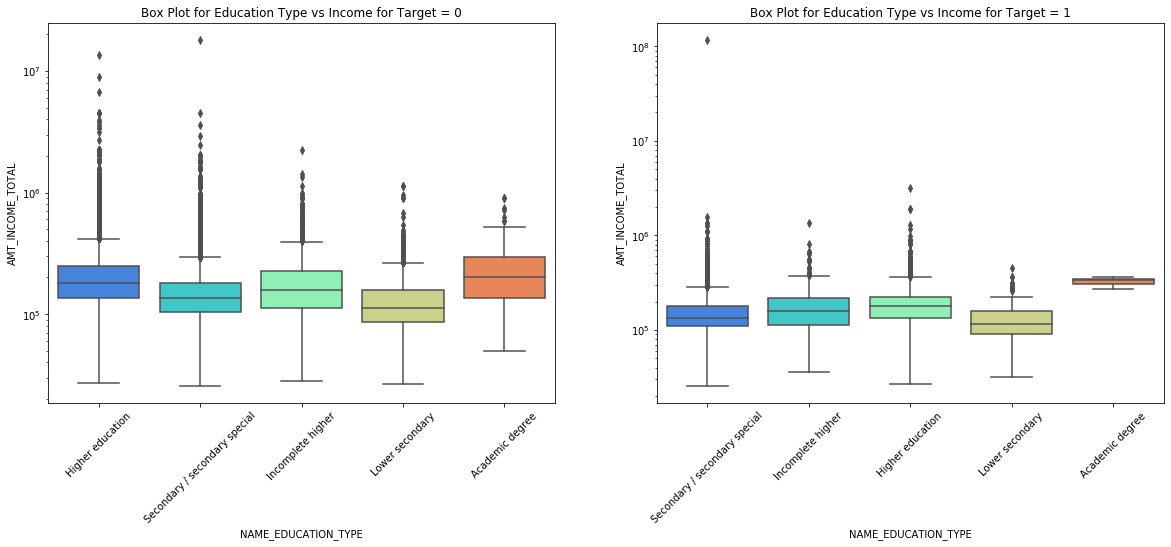

In [95]:
# NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL
plt.figure(figsize=[20,7])
boxplots_bivariate("NAME_EDUCATION_TYPE","AMT_INCOME_TOTAL", "Box Plot for Education Type vs Income for Target = 0","Box Plot for Education Type vs Income for Target = 1")

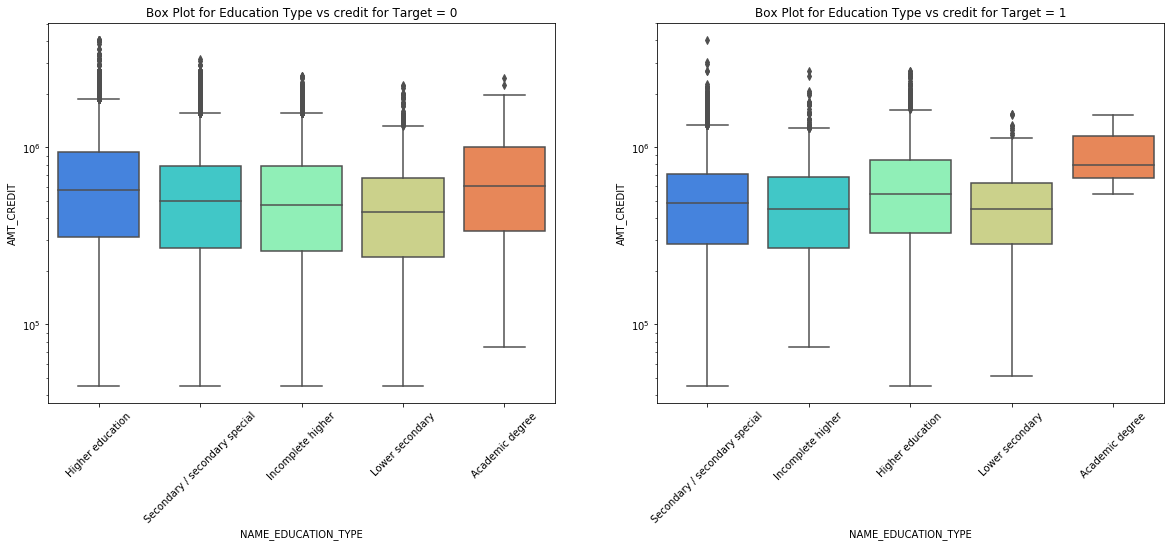

In [96]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT
plt.figure(figsize=[20,7])
boxplots_bivariate("NAME_EDUCATION_TYPE","AMT_CREDIT","Box Plot for Education Type vs credit for Target = 0","Box Plot for Education Type vs credit for Target = 1")

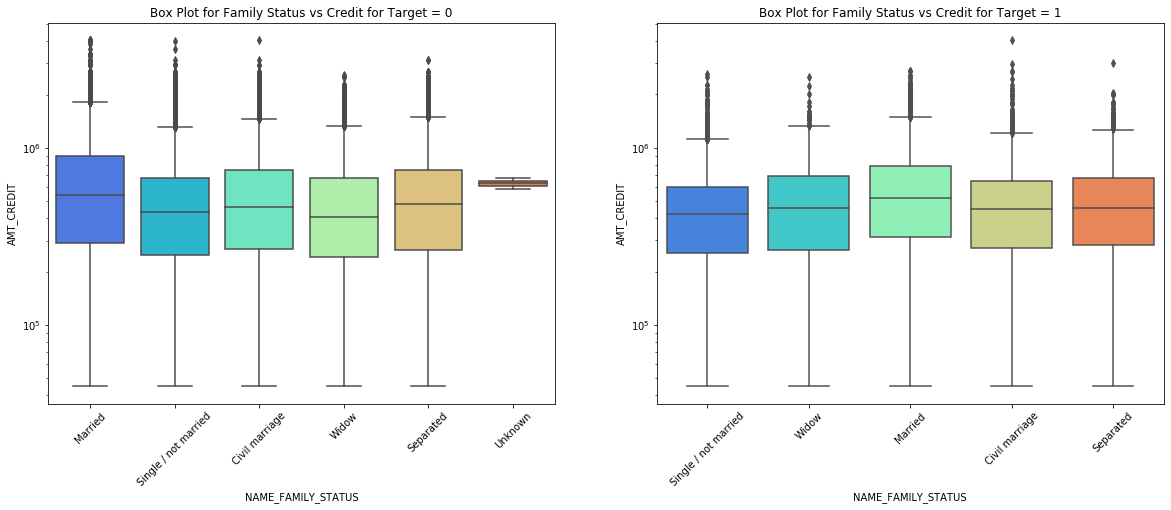

In [97]:
# NAME_FAMILY_STATUS vs AMT_CREDIT
plt.figure(figsize=[20,7])
boxplots_bivariate("NAME_FAMILY_STATUS","AMT_CREDIT", "Box Plot for Family Status vs Credit for Target = 0","Box Plot for Family Status vs Credit for Target = 1")

In [98]:
# Creating function for scatterplot
def scatterplot_bivariate(column1,column2,title1, title2):
    plt.subplot(1,2,1)
    plt.title(title1)
    plt.xticks(rotation=45)
    sns.scatterplot(data =appli1_target0, x=column1,y=column2)
    plt.subplot(1,2,2)
    plt.xticks(rotation=45)
    plt.title(title2)
    sns.scatterplot(data =appli1_target1, x=column1,y=column2)
    plt.show()

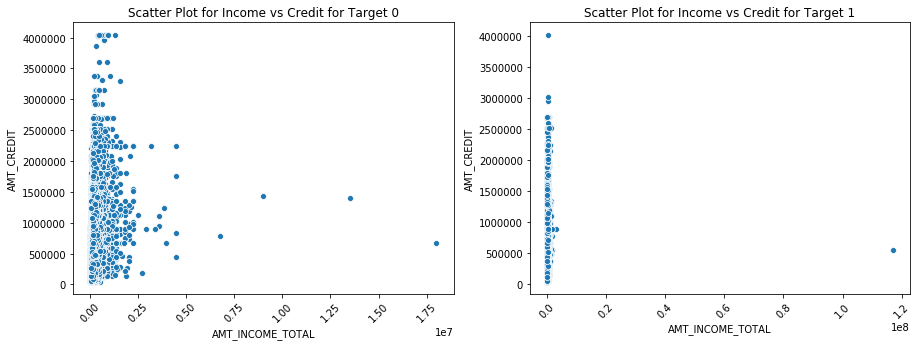

In [99]:
# AMT_INCOME_TOTAL vs AMT_CREDIT
plt.figure(figsize=[15,5])
scatterplot_bivariate("AMT_INCOME_TOTAL","AMT_CREDIT", "Scatter Plot for Income vs Credit for Target 0", "Scatter Plot for Income vs Credit for Target 1")

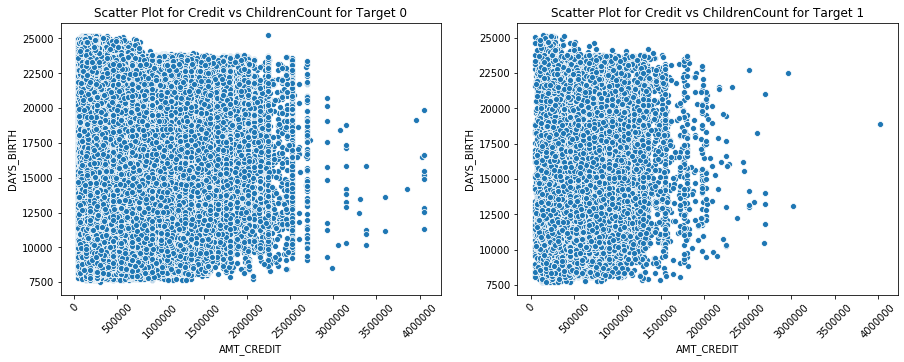

In [100]:
# AMT_CREDIT vs DAYS_BIRTH
plt.figure(figsize=[15,5])
scatterplot_bivariate("AMT_CREDIT","DAYS_BIRTH", "Scatter Plot for Credit vs ChildrenCount for Target 0", "Scatter Plot for Credit vs ChildrenCount for Target 1")

In [101]:
appli1['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [102]:
appli1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

### 8% have defaulted, finding defaults in each by groupby operation

In [103]:
appli1.groupby('NAME_CONTRACT_TYPE')["TARGET"].mean()*100

NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64

In [104]:
appli1.groupby('CODE_GENDER')["TARGET"].mean()*100

CODE_GENDER
F       6.999328
M      10.141920
XNA     0.000000
Name: TARGET, dtype: float64

In [105]:
appli1.groupby('NAME_INCOME_TYPE')["TARGET"].mean()*100

NAME_INCOME_TYPE
Businessman              0.000000
Commercial associate     7.484257
Maternity leave         40.000000
Pensioner                5.386366
State servant            5.754965
Student                  0.000000
Unemployed              36.363636
Working                  9.588472
Name: TARGET, dtype: float64

In [106]:
appli1.groupby('NAME_EDUCATION_TYPE')["TARGET"].mean()*100

NAME_EDUCATION_TYPE
Academic degree                   1.829268
Higher education                  5.355115
Incomplete higher                 8.484966
Lower secondary                  10.927673
Secondary / secondary special     8.939929
Name: TARGET, dtype: float64

In [107]:
appli1.groupby('NAME_FAMILY_STATUS')["TARGET"].mean()*100

NAME_FAMILY_STATUS
Civil marriage          9.944584
Married                 7.559868
Separated               8.194234
Single / not married    9.807675
Unknown                 0.000000
Widow                   5.824217
Name: TARGET, dtype: float64

In [108]:
appli1.groupby('NAME_TYPE_SUITE')["TARGET"].mean()*100

NAME_TYPE_SUITE
0.2858978721410488    5.417957
Children              7.376798
Family                7.494583
Group of people       8.487085
Other_A               8.775982
Other_B               9.830508
Spouse, partner       7.871592
Unaccompanied         8.183047
Name: TARGET, dtype: float64

In [109]:
appli1.groupby('NAME_HOUSING_TYPE')["TARGET"].mean()*100

NAME_HOUSING_TYPE
Co-op apartment         7.932264
House / apartment       7.795711
Municipal apartment     8.539748
Office apartment        6.572411
Rented apartment       12.313051
With parents           11.698113
Name: TARGET, dtype: float64

In [110]:
appli1.groupby(['NAME_HOUSING_TYPE','NAME_INCOME_TYPE'])["TARGET"].mean()*100

NAME_HOUSING_TYPE    NAME_INCOME_TYPE    
Co-op apartment      Commercial associate      8.813559
                     Pensioner                 4.310345
                     State servant             1.190476
                     Working                   9.090909
House / apartment    Businessman               0.000000
                     Commercial associate      7.204032
                     Maternity leave          40.000000
                     Pensioner                 5.334403
                     State servant             5.588030
                     Student                   0.000000
                     Unemployed               35.294118
                     Working                   9.281945
Municipal apartment  Commercial associate      8.087961
                     Pensioner                 6.563526
                     State servant             6.092843
                     Unemployed              100.000000
                     Working                  10.015004
Office

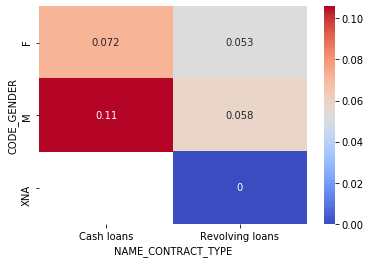

In [111]:
#create heat map of 'NAME_CONTRACT_TYPE' vs 'CODE_GENDER' vs 'TARGET'
res = pd.pivot_table(data=appli1, index='CODE_GENDER', columns='NAME_CONTRACT_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

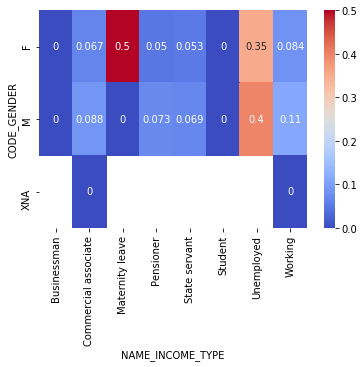

In [112]:
#create heat map of 'NAME_INCOME_TYPE' vs 'CODE_GENDER' vs 'TARGET'
res = pd.pivot_table(data=appli1, index='CODE_GENDER', columns='NAME_INCOME_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

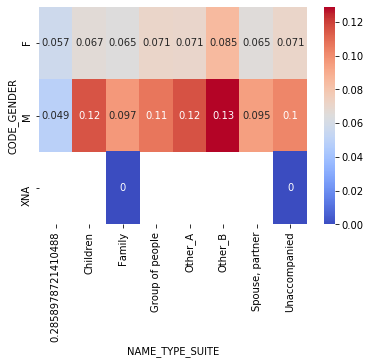

In [113]:
#create heat map of 'NAME_TYPE_SUITE' vs 'CODE_GENDER' vs 'TARGET'
res = pd.pivot_table(data=appli1, index='CODE_GENDER', columns='NAME_TYPE_SUITE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

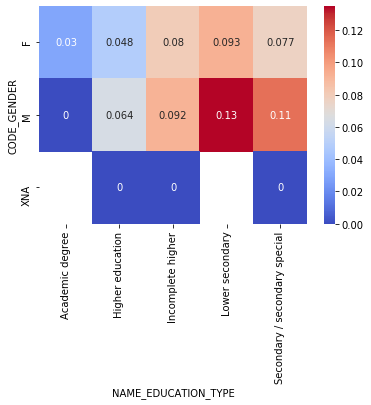

In [114]:
#create heat map of 'NAME_EDUCATION_TYPE' vs 'CODE_GENDER' vs 'TARGET'
res = pd.pivot_table(data=appli1, index='CODE_GENDER', columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

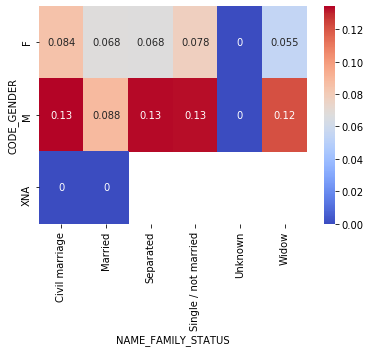

In [115]:
#create heat map of 'NAME_FAMILY_STATUS' vs 'CODE_GENDER' vs 'TARGET'
res = pd.pivot_table(data=appli1, index='CODE_GENDER', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

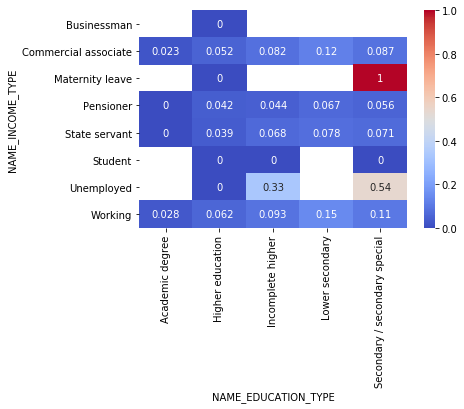

In [116]:
#create heat map of 'NAME_INCOME_TYPE' vs education type vs 'TARGET'
res = pd.pivot_table(data=appli1, index='NAME_INCOME_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

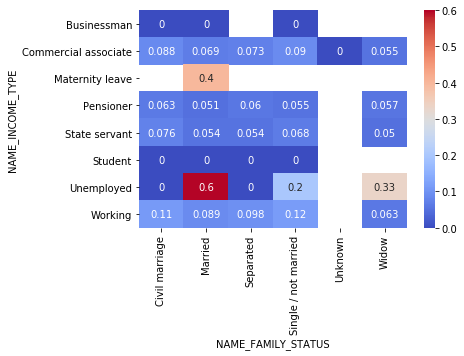

In [117]:
#create heat map of 'NAME_INCOME_TYPE' vs family status vs 'TARGET'
res = pd.pivot_table(data=appli1, index='NAME_INCOME_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

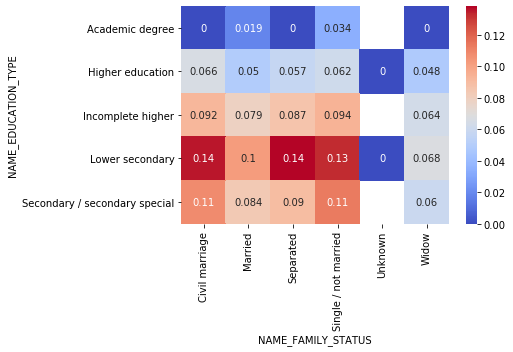

In [118]:
#create heat map of 'NAME_EDUCATION_TYPE' vs family status vs 'TARGET'
res = pd.pivot_table(data=appli1, index='NAME_EDUCATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

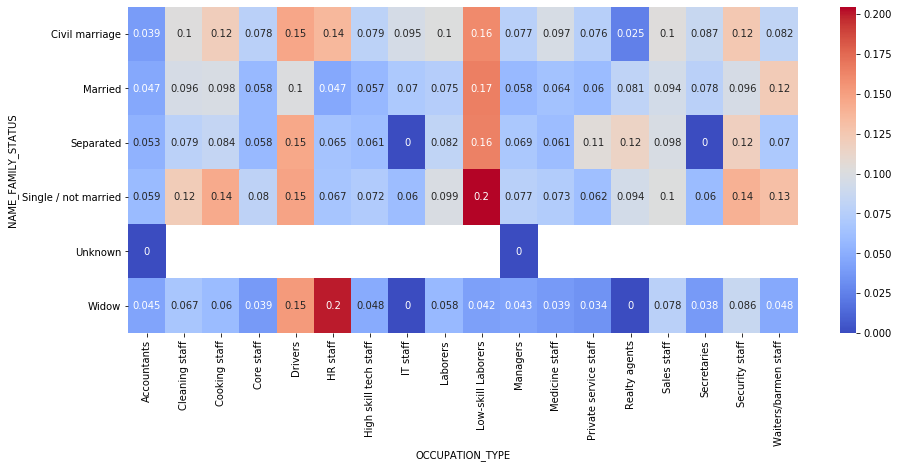

In [119]:
#create heat map of 'NAME_FAMILY_STATUS' vs 'OCCUPATION_TYPE' vs 'TARGET'
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=appli1, index='NAME_FAMILY_STATUS', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

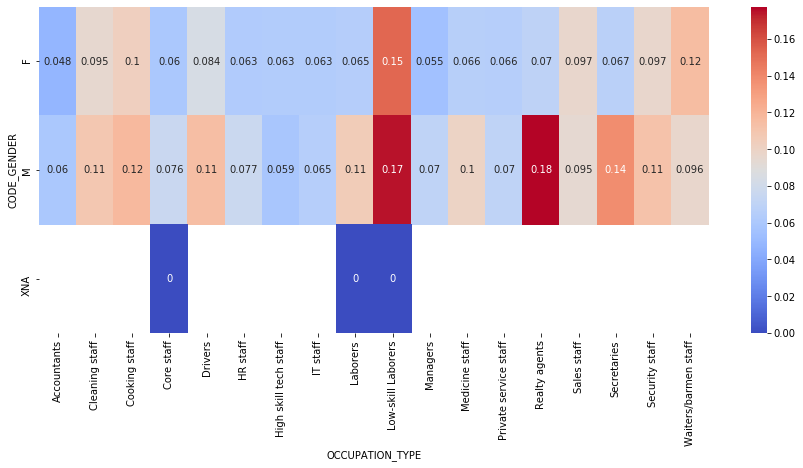

In [120]:
#create heat map of 'CODE_GENDER' vs 'OCCUPATION_TYPE' vs 'TARGET'
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=appli1, index='CODE_GENDER', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

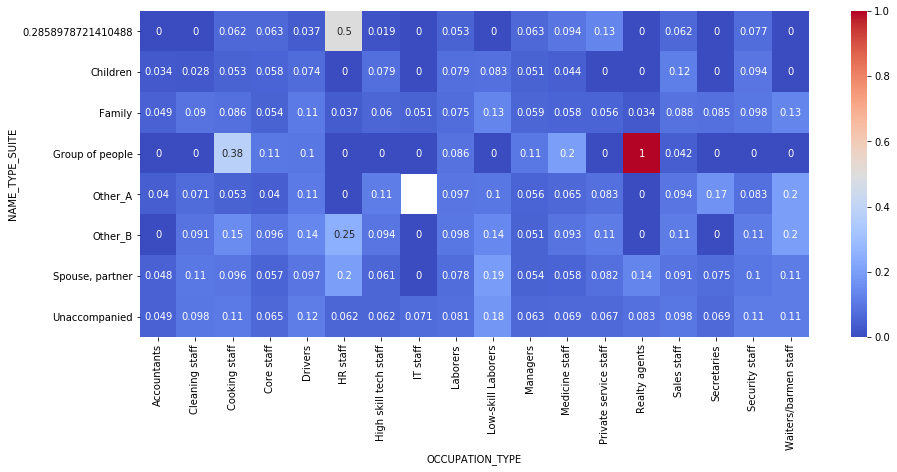

In [121]:
#create heat map of 'NAME_TYPE_SUITE' vs 'OCCUPATION_TYPE' vs 'TARGET'
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=appli1, index='NAME_TYPE_SUITE', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

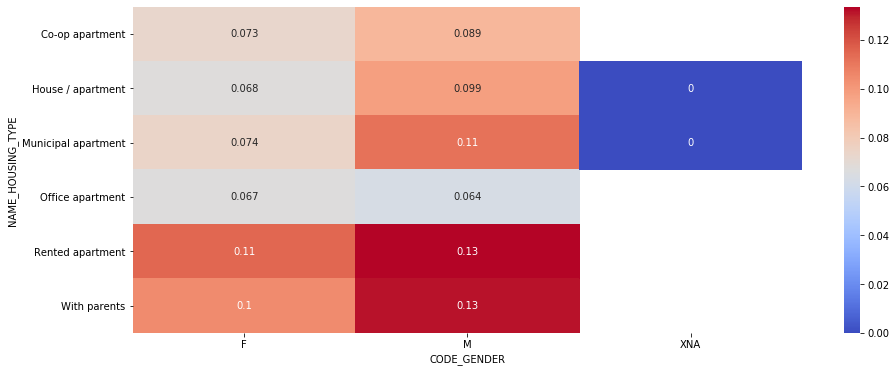

In [122]:
#create heat map of 'NAME_HOUSING_TYPE' vs 'CODE_GENDER' vs 'TARGET'
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=appli1, index='NAME_HOUSING_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

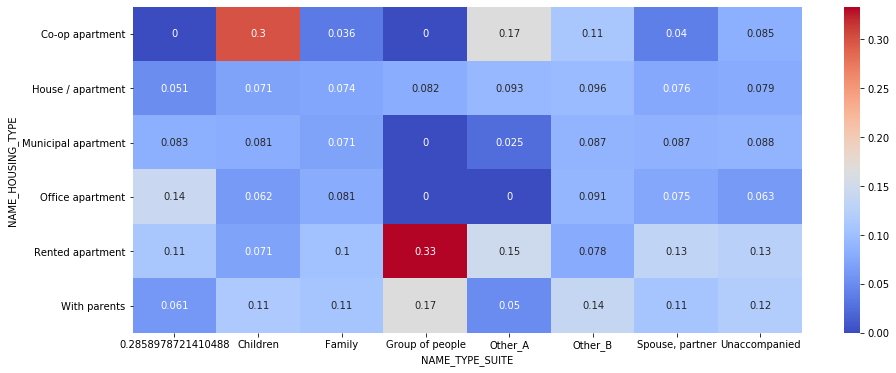

In [123]:
#create heat map of 'NAME_HOUSING_TYPE' vs 'NAME_TYPE_SUITE' vs 'TARGET'
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=appli1, index='NAME_HOUSING_TYPE', columns='NAME_TYPE_SUITE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

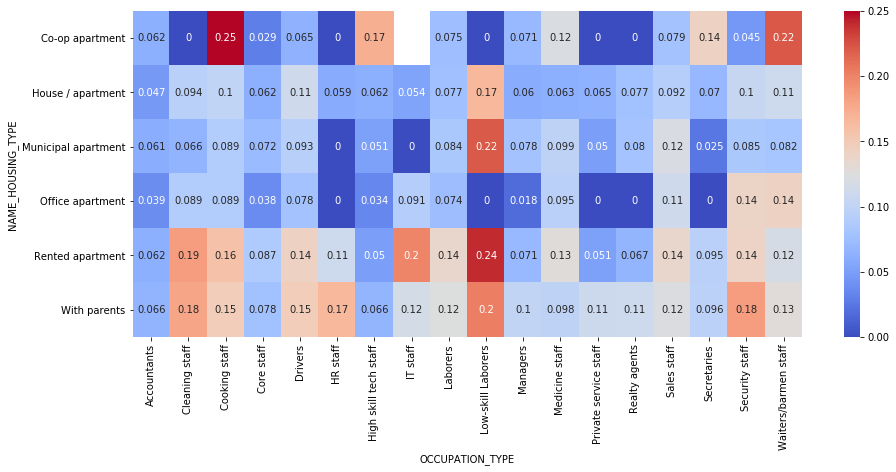

In [124]:
#create heat map of 'NAME_HOUSING_TYPE' vs 'OCCUPATION_TYPE' vs 'TARGET'
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=appli1, index='NAME_HOUSING_TYPE', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

### 7. Merging application and previous application (appli1 and prev1)

In [125]:
df_final=pd.merge(left=appli1,right=prev1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [126]:
df_final.shape

(1413701, 80)

In [127]:
df_final

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000,400000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.

In [128]:
df_final.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_              object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_                     float64
AMT_ANNUITY_                    float64
AMT_GOODS_PRICE_                float64
NAME_TYPE_SUITE_                 object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OCCUPATION_TYPE                  object
WEEKDAY_APPR_PROCESS_START_      object
HOUR_APPR_PROCESS_START_          int64
REG_REGION_NOT_LIVE_REGION       object


In [129]:
df_final["TARGET"].value_counts(normalize = True)*100

0    91.344704
1     8.655296
Name: TARGET, dtype: float64

### 7.1 Impact of Gender on defaults

In [130]:
# impact of gender on defaults

df_final.groupby('CODE_GENDER')["TARGET"].mean().sort_values(ascending = True)*100

CODE_GENDER
XNA     0.000000
F       7.625696
M      10.801144
Name: TARGET, dtype: float64

#### Now that we have combined two datasets, we can still see Males default more compared to Females. 

### 7.2 Impact of Income type on default

In [131]:
# impact of income type on default

df_final.groupby('NAME_INCOME_TYPE')["TARGET"].mean().sort_values(ascending = True)*100

NAME_INCOME_TYPE
Student                   0.000000
Pensioner                 5.833796
State servant             6.411506
Commercial associate      8.114010
Working                  10.244597
Unemployed               54.471545
Maternity leave         100.000000
Name: TARGET, dtype: float64

#### Inferences:
 1. People who belong to categories Maternity Leave,Unemployed pose highest risk of defaulting, People who belong to those groups should not be targetted for advertising loans.
 2. People who belong to categories Student, Pensioner and Servent seem very unlikely to default and they seem to be best segmets to target.
 3. On the otherhand, We need to closely check customers belonging to Working category before taing a decision to grant a loan.

### 7.3 Impact of name family status on default

In [132]:
# impact of name family status on default

df_final.groupby('NAME_FAMILY_STATUS')["TARGET"].mean().sort_values(ascending = True)*100

NAME_FAMILY_STATUS
Widow                    5.991009
Married                  8.342317
Separated                8.486063
Single / not married    10.158740
Civil marriage          10.313851
Name: TARGET, dtype: float64

#### inferences :
- Customers who are single/not married and civil married need to be checked carefully before deciding to grant loans.

### 7.4 Impact of Education type on default

In [133]:
# impact of education type on default
df_final.groupby('NAME_EDUCATION_TYPE')["TARGET"].mean().sort_values(ascending = True)*100

NAME_EDUCATION_TYPE
Academic degree                   1.727116
Higher education                  6.048682
Incomplete higher                 8.984539
Secondary / secondary special     9.393758
Lower secondary                  10.877418
Name: TARGET, dtype: float64

#### Inferences : 
 1. Customers who belong to 'Academic Degree' and 'Higher Education' seem to be the best category to target .
 2. Customers who belong to 'Lower secondary' and 'Secondary / secondary special' need to be checked carefully before granting loan. 

### 7.5 impact of Housing type on default

In [134]:
# impact of housing type on default
df_final.groupby('NAME_HOUSING_TYPE')["TARGET"].mean().sort_values(ascending = True)*100

NAME_HOUSING_TYPE
Office apartment        7.219111
House / apartment       8.376602
Co-op apartment         8.452951
Municipal apartment     9.465779
Rented apartment       12.554966
With parents           12.727627
Name: TARGET, dtype: float64

#### Inferences :
- Customers who live with parents and in Rented aparments need to be checked carefully before deciding to grant loans.

### 7.6 Impact of Occupation type on default

In [135]:
# impact of occupation type on default
df_final.groupby('OCCUPATION_TYPE')["TARGET"].mean().sort_values(ascending = True)*100

OCCUPATION_TYPE
Accountants               5.739072
Private service staff     6.389933
Core staff                6.847775
IT staff                  6.870229
High skill tech staff     6.979766
Managers                  7.130744
HR staff                  7.349762
Medicine staff            7.547689
Secretaries               8.016731
Laborers                  8.468582
Cleaning staff            9.248602
Sales staff               9.968419
Realty agents            10.073363
Waiters/barmen staff     10.909980
Cooking staff            10.934345
Security staff           11.699577
Drivers                  12.043965
Low-skill Laborers       19.098712
Name: TARGET, dtype: float64

#### Inferences :
1. People who belong to Accountants,High skill tech staff,IT staff,HR staff,Private service staff categories seem to be the best targets.
2. Drivers,Low-skilled,Security Staff,Cooking Staff,Laborers & Waiters appear to have defaulted more compared to other categories, it is good to avoid.

### 7.7 Analysing previous application status

In [136]:
df_final["NAME_CONTRACT_STATUS"].value_counts(normalize = True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

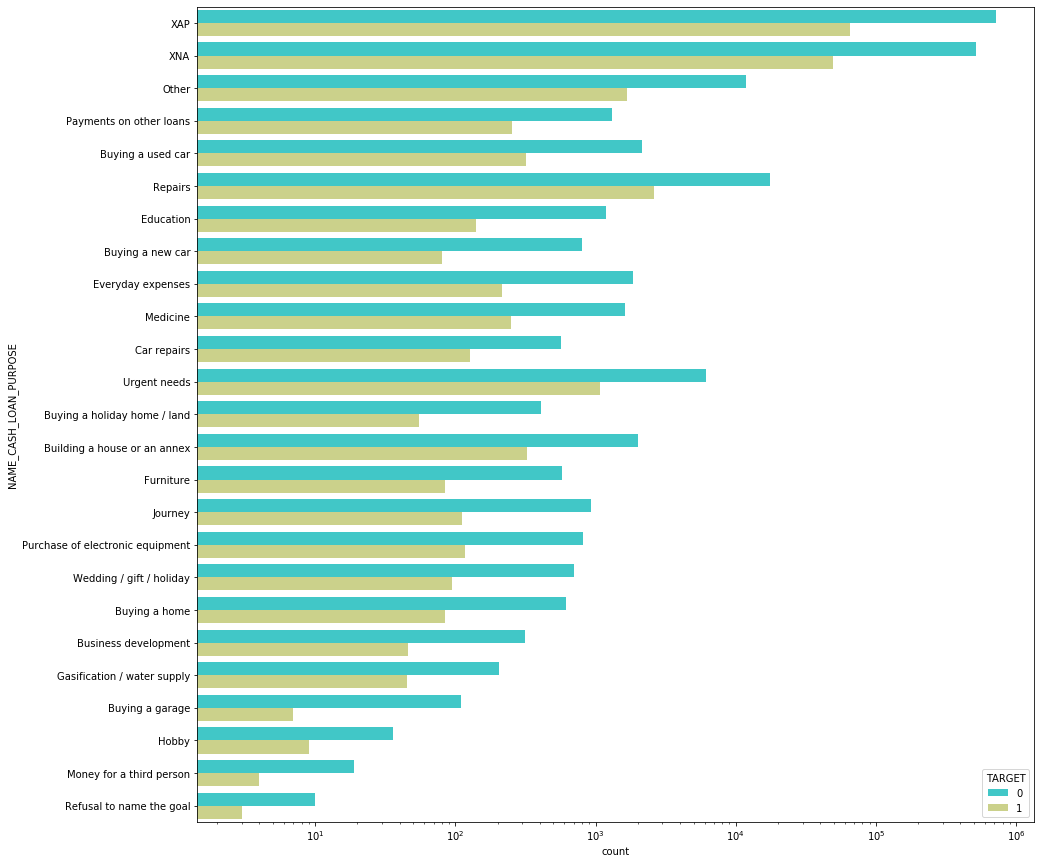

In [137]:
plt.figure(figsize=[15,15])
plt.xscale('log')
sns.countplot(data = df_final, y= 'NAME_CASH_LOAN_PURPOSE',hue = 'TARGET',palette='rainbow')
plt.show()

#### Inferences :
- Loans given to people for Car Repairs and Urgent needs seem to have been defaulted more often.

In [138]:
# impact of contract type
df_final.groupby('NAME_CONTRACT_TYPE_')['TARGET'].mean()*100

NAME_CONTRACT_TYPE_
Cash loans         8.914977
Revolving loans    5.470700
Name: TARGET, dtype: float64

#### inference
- Cash loans have more defaulters

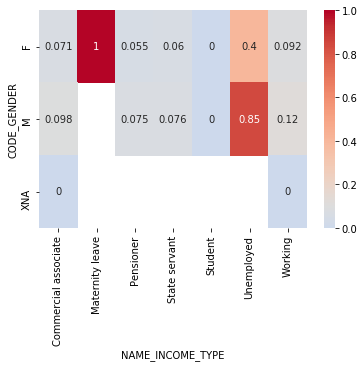

In [139]:
#create heat map of income type vs gender vs target
res = pd.pivot_table(data=df_final, index='CODE_GENDER', columns='NAME_INCOME_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm', center=0.1)
plt.show()

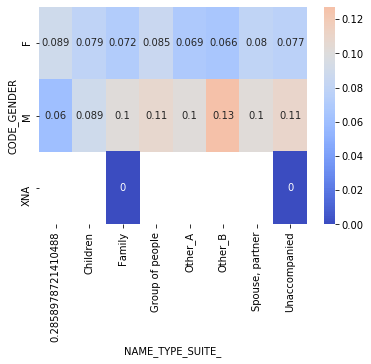

In [140]:
res = pd.pivot_table(data=df_final, index='CODE_GENDER', columns='NAME_TYPE_SUITE_', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm', center=0.1)
plt.show()

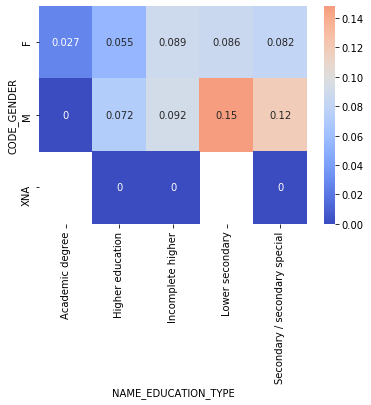

In [141]:
res = pd.pivot_table(data=df_final, index='CODE_GENDER', columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm', center=0.1)
plt.show()

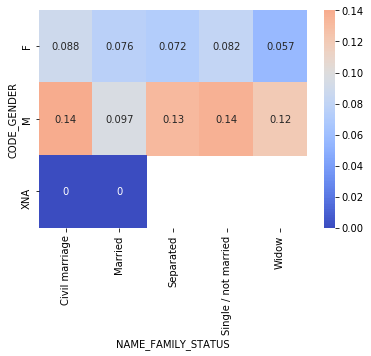

In [142]:
res = pd.pivot_table(data=df_final, index='CODE_GENDER', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm', center=0.1)
plt.show()

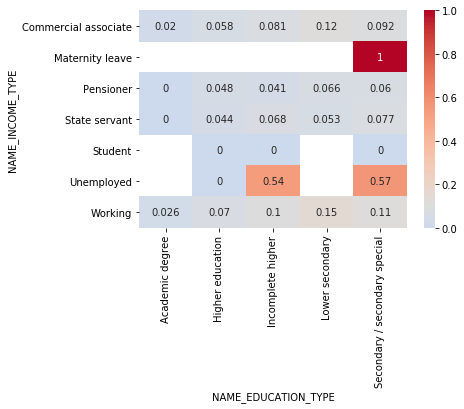

In [143]:
res = pd.pivot_table(data=df_final, index='NAME_INCOME_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm', center=0.1)
plt.show()

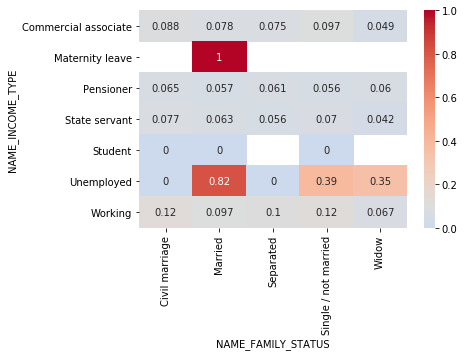

In [144]:
res = pd.pivot_table(data=df_final, index='NAME_INCOME_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm', center=0.1)
plt.show()

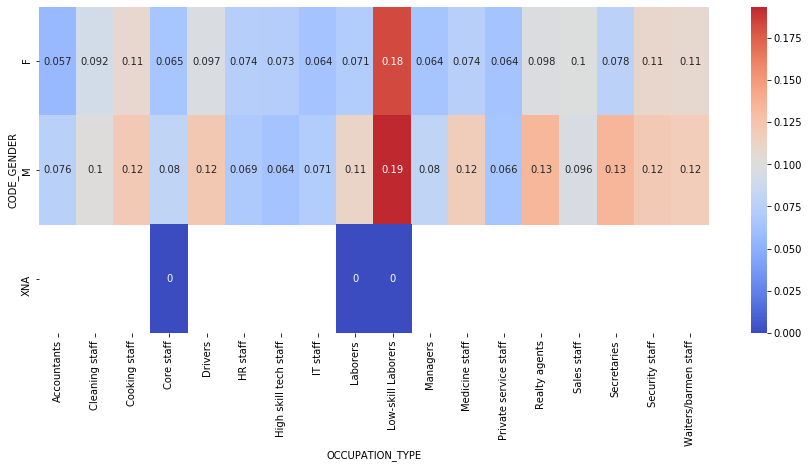

In [145]:
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=df_final, index='CODE_GENDER', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm', center=0.1)
plt.show()

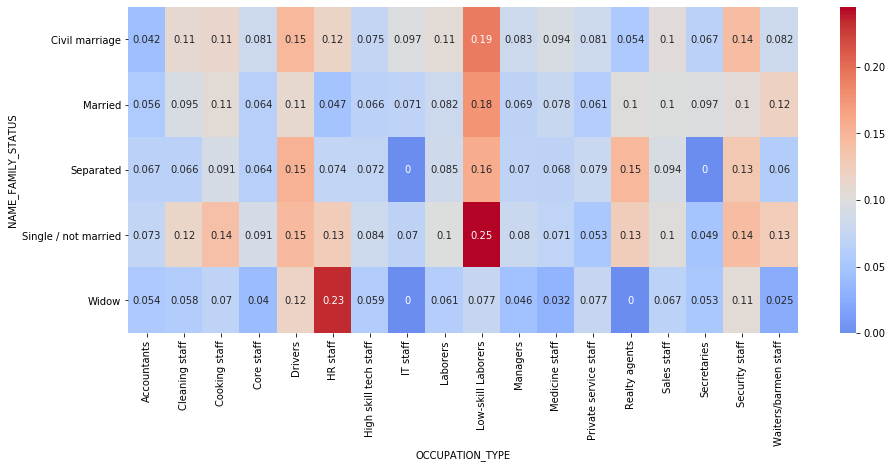

In [146]:
plt.figure(figsize=[15,6])
res = pd.pivot_table(data=df_final, index='NAME_FAMILY_STATUS', columns='OCCUPATION_TYPE', values='TARGET')
sns.heatmap(res, annot=True, cmap='coolwarm', center=0.1)
plt.show()